In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv('/content/drive/MyDrive/GOOGLE COLAB/rideshare_kaggle.csv')
train = data.head()
train

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

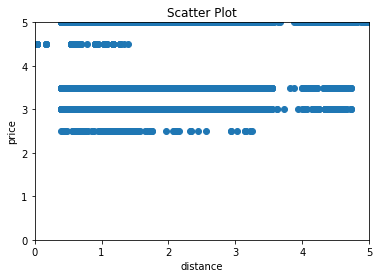

In [14]:
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.scatter(data.distance, data.price)
plt.title("Scatter Plot")
plt.xlabel("distance")
plt.ylabel("price")
plt.show()

0         Morning
1         Morning
2         Morning
3         Morning
4         Morning
           ...   
693066      Night
693067      Night
693068      Night
693069      Night
693070      Night
Name: hour, Length: 693071, dtype: category
Categories (4, object): ['Morning' < 'Afternoon' < 'Evening' < 'Night']

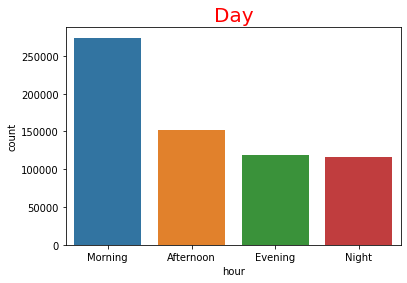

In [15]:
day=pd.cut(x=data.hour,bins=[0,10,15,19,23],labels = ['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Day',color='r', fontsize = 20)
sns.countplot(x=day)
day

In [16]:
X = data[['hour']]
X = np.array(X)
X = X.astype(float)
y = data[['price']]
y = np.array(y)
num_features = X.shape[1]
w = np.array(np.random.normal(size=num_features))
b = np.random.normal(size=1)

In [17]:
def compute_model_output(X, y, w, b):
    m = X.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * X[i] + b
    return f_wb

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


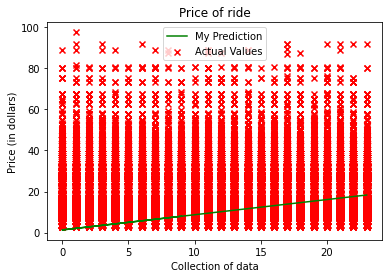

In [18]:
prediction = compute_model_output(X, y, w, b)

# Plot our model prediction
plt.plot(X, prediction, c='g',label='My Prediction')

# Plot the data points
plt.scatter(X, y, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Price of ride")
# Set the y-axis label
plt.ylabel('Price (in dollars)')
# Set the x-axis label
plt.xlabel('Collection of data')
plt.legend()
plt.show()